In [5]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

In [160]:
path = 'input/'
filename = 'HL_IB'
data = path + filename + '.csv'

In [94]:
df = pd.read_csv(data)
X = np.array(df.iloc[:, 1])

In [95]:
X = np.expand_dims(X, axis=1)

In [77]:
qt = QuantileTransformer(output_distribution='normal')
df.iloc[:, 1] = qt.fit_transform(X).ravel()
df.to_csv(path + filename + '_qt' + ext, index=False)

In [80]:
pt = PowerTransformer(method='box-cox')
pt.fit(X)
df.iloc[:, 1] = pt.transform(X).ravel()
df.to_csv(path + filename + '_pt' + ext, index=False)

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

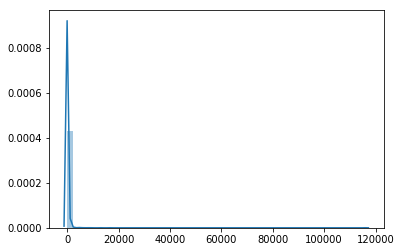

In [100]:
sns.distplot(X)

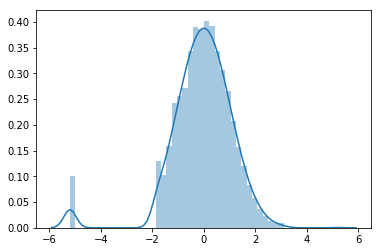

In [97]:
sns.distplot(qt.fit_transform(X).ravel())

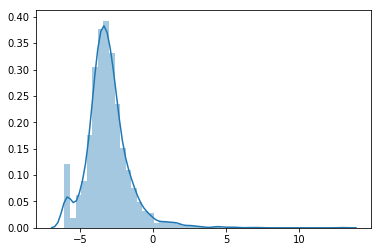

In [98]:
sns.distplot(pt.transform(X).ravel())

In [104]:
from matplotlib_venn import venn3

In [161]:
a = set(pd.read_csv('output/190814_{}/cor_sig_local.csv'.format(filename)).iloc[:, 0].tolist())
b = set(pd.read_csv('output/190815_{}_qt/cor_sig_local.csv'.format(filename)).iloc[:, 0].tolist())
c = set(pd.read_csv('output/190815_{}_pt/cor_sig_local.csv'.format(filename)).iloc[:, 0].tolist())

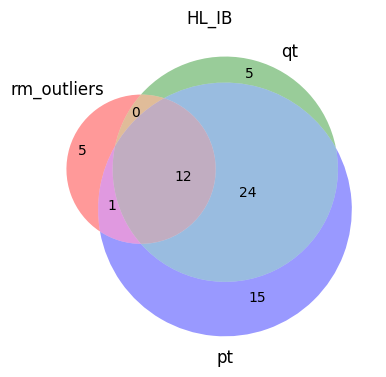

In [163]:
fig, ax = plt.subplots(figsize=(4, 4), dpi = 100)
venn3([a, b, c], ('rm_outliers', 'qt', 'pt'))
ax.set_title(filename)
plt.tight_layout()
plt.savefig('outliers_detection_figures/{}_venn.png'.format(filename))